In [1]:
from skimage import io
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn import svm
import pandas as pd
import itertools

In [2]:
#load bands
collection = io.imread_collection('E:/Company/KAVOSHGARAN/Virtual Irrigation/Image/Landsat/*.tif',  plugin='tifffile')

In [3]:
#get each band
B2 = collection[1]
B3 = collection[2]
B4 = collection[3]

In [4]:
#normalization
normal4 = (B4 - np.min(B4))/(np.max(B4) - np.min(B4))
normal3 = (B3 - np.min(B3))/(np.max(B3) - np.min(B3))
normal2 = (B2 - np.min(B2))/(np.max(B2) - np.min(B2))

In [5]:
#create RGB picture
rgb = np.stack([normal4, normal3, normal2], axis=2)

In [6]:
#get shape
width = collection[0].shape[0]
height = collection[0].shape[1]

In [7]:
width

998

In [8]:
height

998

In [9]:
#To get all images together
all_images = io.concatenate_images(collection).transpose()

In [10]:
#reshape all images to our width and  our height 
all_image_reshape = all_images.reshape((height*width, len(collection)))

In [11]:
all_image_reshape

array([[ -64,  386, 3311,  163, 1695,  844],
       [ -57,  329, 2843,  191, 1517,  794],
       [ -40,  429, 2769,  236, 1772,  955],
       ...,
       [ 456,  701, 1649,  796,  921,  531],
       [ 311,  635, 2440,  631, 1350,  779],
       [  70,  452, 2843,  342, 1276,  668]], dtype=int16)

In [12]:
#To create our class for classification
class_num = 4
#To get pixel we need
sample_num = 5

In [13]:
#get bands for pandas
columns = ['Band{}'.format(i+1) for i in range(len(collection))]
#creating classes DataFrame
classes_df = pd.DataFrame(columns =columns )

In [14]:
columns

['Band1', 'Band2', 'Band3', 'Band4', 'Band5', 'Band6']

In [15]:
classes_df

,Band1,Band2,Band3,Band4,Band5,Band6


In [16]:
#detection 5 sample to each class
targets = [[i+1]*sample_num for i in range(class_num)]

In [17]:
targets

[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4]]

In [18]:
#merged calasses to create dataframe
merged = list(itertools.chain(*targets))

In [19]:
merged

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]

In [20]:
#create column of lable
classes_df['Lable'] = merged

In [21]:
classes_df

,Band1,Band2,Band3,Band4,Band5,Band6,Lable
0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,1
5,NaN,NaN,NaN,NaN,NaN,NaN,2
6,NaN,NaN,NaN,NaN,NaN,NaN,2
7,NaN,NaN,NaN,NaN,NaN,NaN,2
8,NaN,NaN,NaN,NaN,NaN,NaN,2
9,NaN,NaN,NaN,NaN,NaN,NaN,2


# Using OpenCv and Support Vector Machine To train model

In [22]:
i = 0

In [23]:
def mouseclick(event , x , y , flags , param):
    global i 
    
   
    if event == cv2.EVENT_LBUTTONDOWN:
        
        if i < class_num * sample_num:
            
            my_list = []
            
            for j in collection:
                
                my_list.append(j[x][y])
                
            classes_df.iloc[i , 0 : len(collection)] = my_list
            i = i+1
            print(classes_df)
        #To train our model        
        else : 

            array = classes_df.values

            X = array[: , 0:len(collection)]
            Y = array[:, len(collection)].astype('int')


            #start classifier
            clf = svm.SVC(gamma='scale')#Start Classifier
            clf.fit(X,Y)
            pred = clf.predict(all_image_reshape)
    
            #reshape
            reshape_predict = pred.reshape((height , width)).transpose()

            #demonestrate prediction
            plt.figure(figsize=(30,30))
            plt.imshow(reshape_predict)
            plt.title('Classification' , fontsize = 30)
            plt.axis('off')
            plt.savefig('C:/Users/Lenovo/Desktop/Virtual-Irrigation/Machine_learning/supervised learning/Support Vector Machine/images/svm.png')
            plt.show()

            

   Band1 Band2 Band3 Band4 Band5 Band6  Lable
0   -161   213  2310    74  1111   557      1
1    NaN   NaN   NaN   NaN   NaN   NaN      1
2    NaN   NaN   NaN   NaN   NaN   NaN      1
3    NaN   NaN   NaN   NaN   NaN   NaN      1
4    NaN   NaN   NaN   NaN   NaN   NaN      1
5    NaN   NaN   NaN   NaN   NaN   NaN      2
6    NaN   NaN   NaN   NaN   NaN   NaN      2
7    NaN   NaN   NaN   NaN   NaN   NaN      2
8    NaN   NaN   NaN   NaN   NaN   NaN      2
9    NaN   NaN   NaN   NaN   NaN   NaN      2
10   NaN   NaN   NaN   NaN   NaN   NaN      3
11   NaN   NaN   NaN   NaN   NaN   NaN      3
12   NaN   NaN   NaN   NaN   NaN   NaN      3
13   NaN   NaN   NaN   NaN   NaN   NaN      3
14   NaN   NaN   NaN   NaN   NaN   NaN      3
15   NaN   NaN   NaN   NaN   NaN   NaN      4
16   NaN   NaN   NaN   NaN   NaN   NaN      4
17   NaN   NaN   NaN   NaN   NaN   NaN      4
18   NaN   NaN   NaN   NaN   NaN   NaN      4
19   NaN   NaN   NaN   NaN   NaN   NaN      4
   Band1 Band2 Band3 Band4 Band5 B

   Band1 Band2 Band3 Band4 Band5 Band6  Lable
0   -161   213  2310    74  1111   557      1
1   -222   123  2096    75  1182   626      1
2     62   560  3494   313  1834   897      1
3   -212   123  1969    46  1096   559      1
4   -161   202  3359    86  1467   689      1
5    460   813  1401  1021   924   698      2
6    220   255   158   117   146   124      2
7    182   184   140   110   145   123      2
8    181   199   137   107   134   117      2
9    237   274   191   160   168   142      2
10   NaN   NaN   NaN   NaN   NaN   NaN      3
11   NaN   NaN   NaN   NaN   NaN   NaN      3
12   NaN   NaN   NaN   NaN   NaN   NaN      3
13   NaN   NaN   NaN   NaN   NaN   NaN      3
14   NaN   NaN   NaN   NaN   NaN   NaN      3
15   NaN   NaN   NaN   NaN   NaN   NaN      4
16   NaN   NaN   NaN   NaN   NaN   NaN      4
17   NaN   NaN   NaN   NaN   NaN   NaN      4
18   NaN   NaN   NaN   NaN   NaN   NaN      4
19   NaN   NaN   NaN   NaN   NaN   NaN      4
   Band1 Band2 Band3 Band4 Band5 B

   Band1 Band2 Band3 Band4 Band5 Band6  Lable
0   -161   213  2310    74  1111   557      1
1   -222   123  2096    75  1182   626      1
2     62   560  3494   313  1834   897      1
3   -212   123  1969    46  1096   559      1
4   -161   202  3359    86  1467   689      1
5    460   813  1401  1021   924   698      2
6    220   255   158   117   146   124      2
7    182   184   140   110   145   123      2
8    181   199   137   107   134   117      2
9    237   274   191   160   168   142      2
10    76   706  4070   344  1990   991      3
11   -10   375  3759   190  1662   767      3
12   284   654  1145   780   519   362      3
13   403   687  1406   872   598   370      3
14   236   615  2332   663  1318   813      3
15    98   634  4260   355  2250  1134      4
16    58   381  2398   302  1353   705      4
17    58   397  2850   308  1542   792      4
18   329   751  3102   715  2122  1306      4
19   NaN   NaN   NaN   NaN   NaN   NaN      4
   Band1 Band2 Band3 Band4 Band5 B

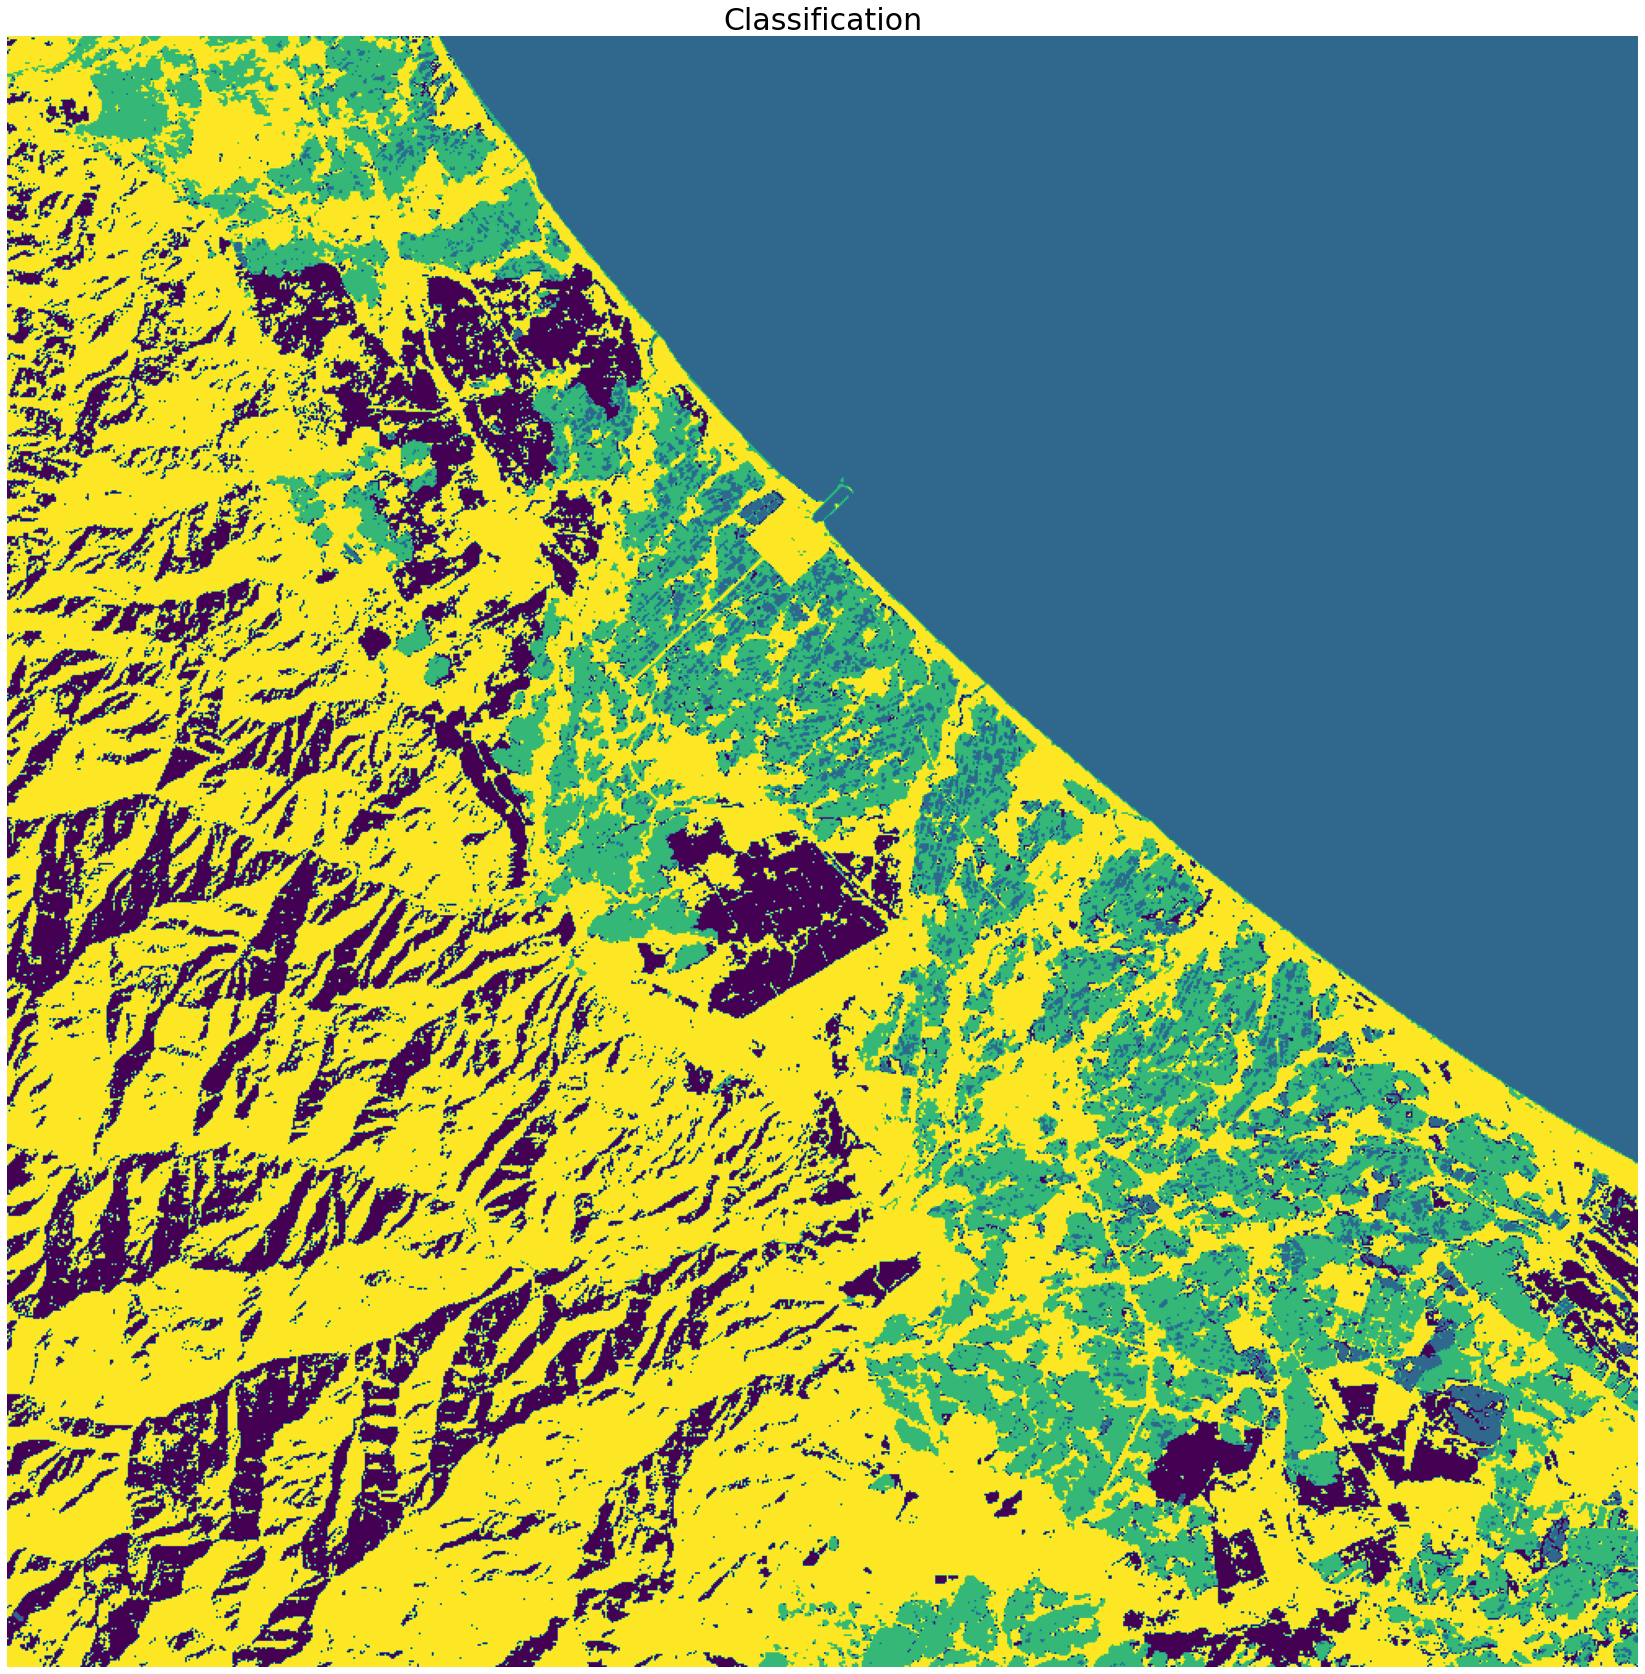

In [ ]:
#Using OpenCv

cv2.namedWindow('mouseClick', cv2.WINDOW_NORMAL)
cv2.setMouseCallback('mouseClick', mouseclick)

while True:
    cv2.imshow('mouseClick', rgb)
    if cv2.waitKey(20) == 27:
        break
        
cv2.destroyAllWindow()